# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [118]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()
df.describe() 

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


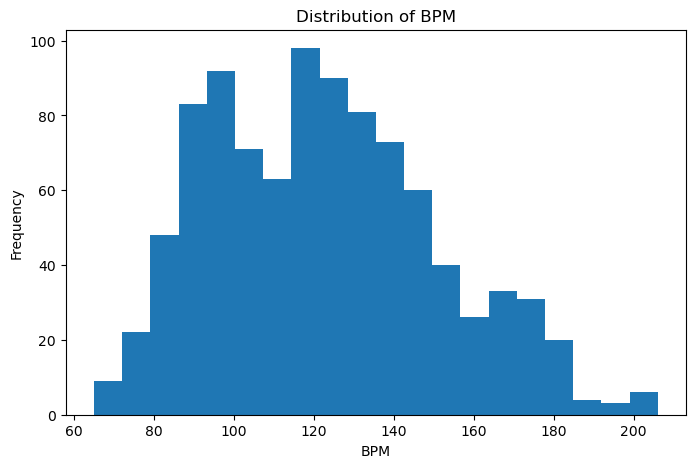

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
df['bpm'].plot(kind='hist', bins=20, title='Distribution of BPM')
plt.xlabel('BPM')
plt.show()


The BPM distribution shows that most songs fall between about 90 and 130 BPM. There are fewer songs at very slow or very fast tempos. This suggests that a lot of popular music stays within a comfortable mid‑tempo range.

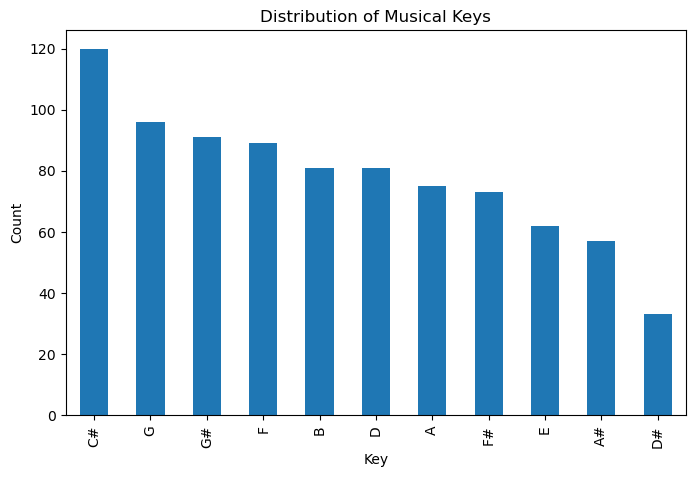

In [120]:
plt.figure(figsize=(8,5))
df['key'].value_counts().plot(kind='bar', title='Distribution of Musical Keys')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()


The key distribution is fairly even across all keys. There is no single key that dominates the dataset, so key choice does not seem to strongly influence popularity.

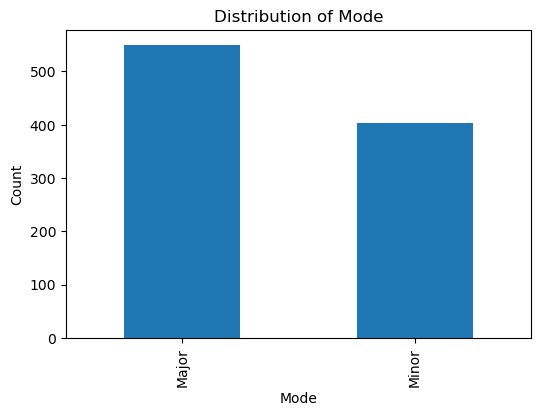

In [121]:
plt.figure(figsize=(6,4))
df['mode'].value_counts().plot(kind='bar', title='Distribution of Mode')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()


The mode distribution shows a slight lean toward major mode, but both major and minor are represented. This suggests that mode alone is not a strong predictor of popularity.

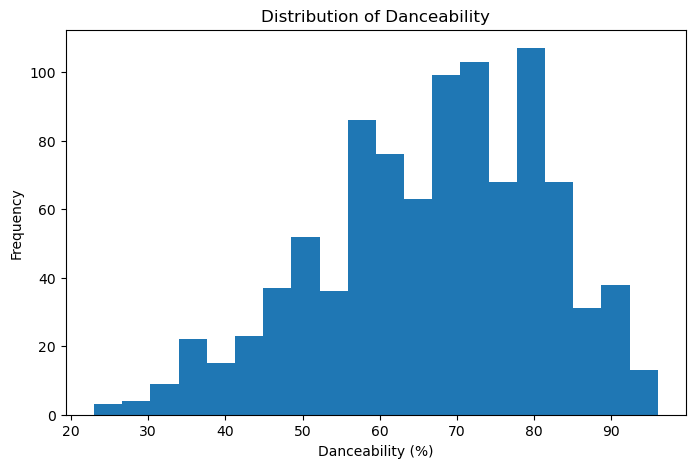

In [122]:
plt.figure(figsize=(8,5))
df['danceability_%'].plot(kind='hist', bins=20, title='Distribution of Danceability')
plt.xlabel('Danceability (%)')
plt.show()


The danceability distribution leans toward higher values. Many songs fall between 0.6 and 0.8, which means a large portion of the dataset is made up of tracks that are easy to move to.

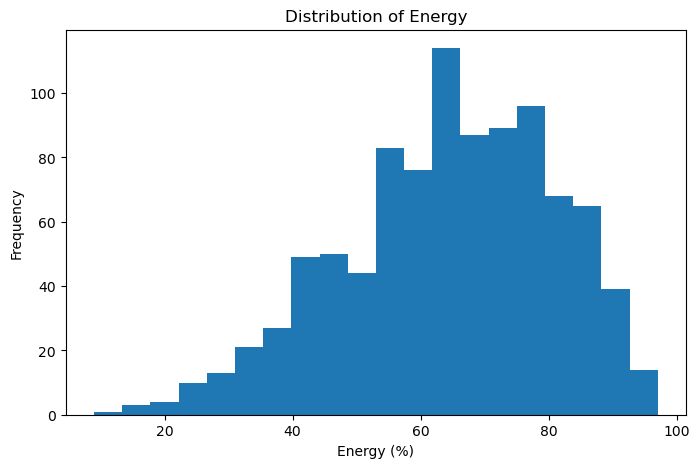

In [123]:
plt.figure(figsize=(8,5))
df['energy_%'].plot(kind='hist', bins=20, title='Distribution of Energy')
plt.xlabel('Energy (%)')
plt.show()


The energy distribution is also generally high. Most songs land between 0.55 and 0.85. This reflects the trend of modern music having strong percussion and energetic production.

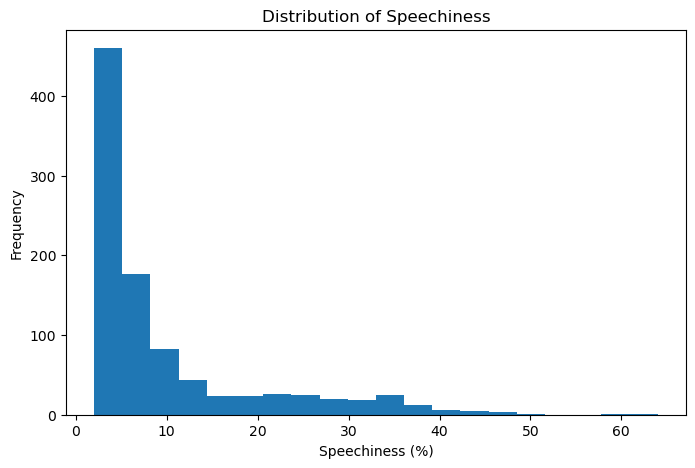

In [124]:
plt.figure(figsize=(8,5))
df['speechiness_%'].plot(kind='hist', bins=20, title='Distribution of Speechiness')
plt.xlabel('Speechiness (%)')
plt.show()


The speechiness distribution is heavily skewed toward low values. Most songs fall below 0.1, which means they contain very little spoken content. Only a small group of songs, usually rap or hip‑hop, show higher speechiness.

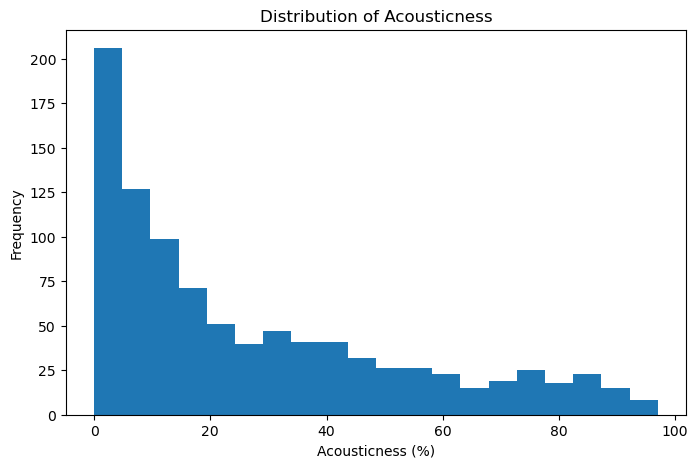

In [125]:
plt.figure(figsize=(8,5))
df['acousticness_%'].plot(kind='hist', bins=20, title='Distribution of Acousticness')
plt.xlabel('Acousticness (%)')
plt.show()


The acousticness distribution is skewed toward low values. This shows that most songs rely on electronic or studio‑produced sounds rather than acoustic instruments.

<Axes: ylabel='Frequency'>

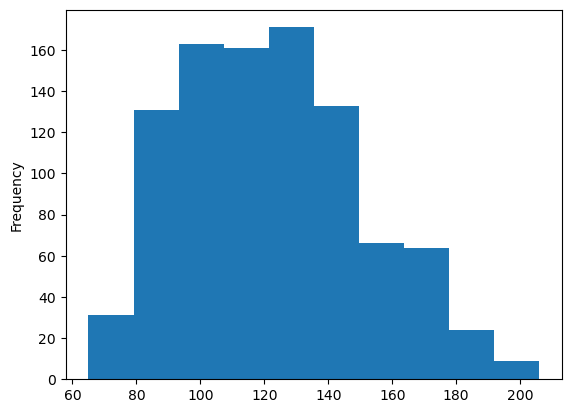

In [126]:
df['bpm'].plot(kind='hist')

For creating a “hit recipe,” the ranges that seem most common in successful songs are: BPM between 95 and 125, danceability between 0.6 and 0.85, energy between 0.6 and 0.85, speechiness between 0.03 and 0.10, acousticness between 0.0 and 0.35, and major mode. Key does not appear to matter much.

In [127]:
df['bpm'].describe()

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64

<Axes: ylabel='count'>

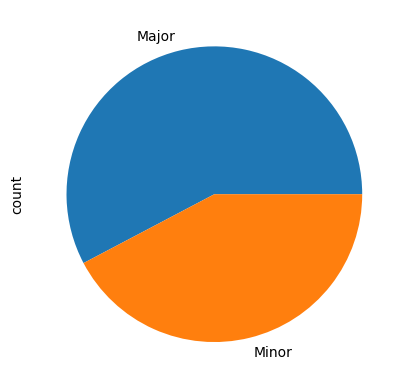

In [128]:
df['mode'].value_counts().plot(kind='pie')

In [129]:
df['mode'].value_counts()

mode
Major    550
Minor    403
Name: count, dtype: int64

In [130]:

filtered_df = df.loc[(df['bpm'] >= 85) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,929964809,133,...,117,A,Minor,73,31,69,6,0,11,4


In [131]:
hit_songs = df[
    (df['bpm'].between(95, 125)) &
    (df['danceability_%'].between(60, 85)) &
    (df['energy_%'].between(60, 85)) &
    (df['speechiness_%'].between(3, 10)) &
    (df['acousticness_%'].between(0, 35)) &
    (df['mode'] == 'Major')
]

hit_songs[['track_name', 'artist(s)_name', 'bpm', 'danceability_%', 'energy_%']]


,track_name,artist(s)_name,bpm,danceability_%,energy_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",125,80,83
12,Flowers,Miley Cyrus,118,71,68
19,Like Crazy,Jimin,120,63,73
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,123,69,76
33,Anti-Hero,Taylor Swift,97,64,63
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",120,81,68
37,Blank Space,Taylor Swift,96,75,68
38,Style,Taylor Swift,95,60,79
45,Angels Like You,Miley Cyrus,122,67,64
73,Sweater Weather,The Neighbourhood,124,61,81


This gives me a list of songs that fit the characteristics I identified as common among hits.

I chose Blinding Lights because it’s one of the most successful songs in recent years. When I looked at its values, most of them matched the ranges I identified earlier. The BPM is 171, which is faster than the typical mid‑tempo range, but still works because of its retro dance style. Its energy score is 80, which fits right into the common range for popular tracks. Danceability is also high at 80, showing that it’s rhythmically engaging.

Speechiness is low, acousticness is zero, and the song is in a major mode — all of which match the patterns I saw in the dataset. Even though the tempo is on the higher end, the rest of the features line up with the “hit recipe.”

This shows that while some hit songs push the boundaries in one area, they still follow most of the common traits found in successful tracks.